# Analysis of road accident patterns in India from 2001 to 2014 in different states

In this notebook, we are analysing the pattern of road accidents in India. We have worked on publicly available data. The workbook is open for further improvement with data from other sources.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
#import pyplot as pyplot
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display as display

import plotly.plotly as py
import plotly.graph_objs as go

#### Getting the data from the files

In [2]:
# Read the data to the dataframe from the data files.
state_year_month_df=pd.read_csv('road_accidents_state_month.csv')
state_year_time_df=pd.read_csv('road_accidents_state_timeblock.csv')

#Get all the state names in an array..
state_names=state_year_month_df['STATE/UT'].unique()

## Feature Engineering

#### <i> Feature engineering 1: Clubbing month columns into seasons</I>
Our data contains breakup of accident figures for every state and every month, since 2001 till 2014. We considered, clubbing monthly data to seasonal data, as monthly details is not required.

In [3]:
#display(state_year_month_df.head())

#Create season groups taking values from multiple month columns..
state_year_month_df['SUMMER']=state_year_month_df[['JUNE','JULY','AUGUST']].sum(axis=1)
state_year_month_df['AUTUMN']=state_year_month_df[['SEPTEMBER','OCTOBER','NOVEMBER']].sum(axis=1)
state_year_month_df['WINTER']=state_year_month_df[['DECEMBER','JANUARY','FEBRUARY']].sum(axis=1)
state_year_month_df['SPRING']=state_year_month_df[['MARCH','APRIL','MAY']].sum(axis=1)

#Delete month columns..
state_year_month_df=state_year_month_df.drop(['JANUARY','FEBRUARY','MARCH','APRIL','MAY','JUNE','JULY'
                                             ,'AUGUST','SEPTEMBER','OCTOBER','NOVEMBER','DECEMBER'], axis=1)
#Create groups of states, summing the values for each years accident numbers..
state_grouped=state_year_month_df.groupby(['STATE/UT']).sum()

#Create % columns for noting the % of accidents happening in each state for each season..
state_grouped['%_SUMMER']=state_grouped['SUMMER']/state_grouped['TOTAL']
state_grouped['%_AUTUMN']=state_grouped['AUTUMN']/state_grouped['TOTAL']
state_grouped['%_WINTER']=state_grouped['WINTER']/state_grouped['TOTAL']
state_grouped['%_SPRING']=state_grouped['SPRING']/state_grouped['TOTAL']

display(state_grouped.head())

,YEAR,TOTAL,SUMMER,AUTUMN,WINTER,SPRING,%_SUMMER,%_AUTUMN,%_WINTER,%_SPRING
STATE/UT,,,,,,,,,,
A & N Islands,28105,2893,689,710,779,715,0.238161,0.245420,0.269271,0.247148
Andhra Pradesh,28105,546821,132891,129230,138633,146067,0.243025,0.236330,0.253525,0.267120
Arunachal Pradesh,28105,3389,748,875,920,846,0.220714,0.258188,0.271467,0.249631
Assam,28105,61718,14696,15382,15671,15969,0.238115,0.249230,0.253913,0.258741
Bihar,28105,92648,23506,20866,21994,26282,0.253713,0.225218,0.237393,0.283676


#### <I> Over the day accident breakup : Merge columns into categories - 'Night', 'Day', 'Afternoon', 'Evening'</I>

In [4]:
#Working on the over the day data...
state_year_time_df.rename(columns={'0-3 hrs. (Night)':'0-3',
                              '3-6 hrs. (Night)':'3-6',
                                '6-9 hrs (Day)':'6-9', '9-12 hrs (Day)':'9-12','12-15 hrs (Day)':'12-15','15-18 hrs (Day)':'15-18',
                                  '18-21 hrs (Night)':'18-21','21-24 hrs (Night)':'21-24'}, inplace=True)
state_time_grouped=state_year_time_df.groupby(['STATE/UT']).sum()

state_time_grouped['%_MORNING']=(state_time_grouped['6-9']+state_time_grouped['9-12'])/state_time_grouped['Total']
state_time_grouped['%_AFTERNOON']=(state_time_grouped['12-15']+state_time_grouped['15-18'])/state_time_grouped['Total']
state_time_grouped['%_EVENING']=(state_time_grouped['18-21']+state_time_grouped['21-24'])/state_time_grouped['Total']
state_time_grouped['%_NIGHT']=(state_time_grouped['0-3']+state_time_grouped['3-6'])/state_time_grouped['Total']

state_time_grouped=state_time_grouped.drop(state_time_grouped.columns[0:9], axis=1)
display(state_time_grouped.head())


,Total,%_MORNING,%_AFTERNOON,%_EVENING,%_NIGHT
STATE/UT,,,,,
A & N Islands,2893,0.297961,0.402351,0.260283,0.039405
Andhra Pradesh,546821,0.243550,0.266599,0.281997,0.207854
Arunachal Pradesh,3389,0.291531,0.383889,0.213927,0.110652
Assam,61718,0.370556,0.363022,0.172510,0.093911
Bihar,92648,0.304853,0.299855,0.208423,0.186869


## <U> Digging into the data to find patterns </U>

### First, lets see the seasonal distribution of accidents over the years, and for all the states taken together

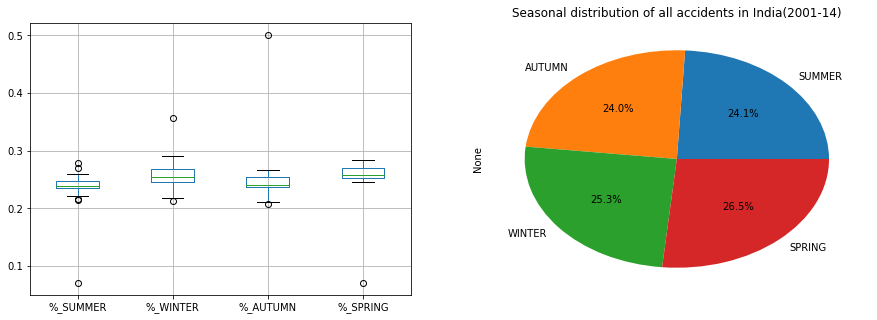

In [5]:
plt.figure(figsize=(15,5))
ax=plt.subplot(1,2,1)
boxplot=state_grouped.boxplot(ax=ax,column=['%_SUMMER','%_WINTER','%_AUTUMN','%_SPRING'])

ax=plt.subplot(1,2,2)
state_grouped.loc[:,'SUMMER':'SPRING'].sum(axis=0).plot.pie(title='Seasonal distribution of all accidents in India(2001-14)',autopct='%1.1f%%')
#Place the pie plot to show the seasonal composition of all accidents over the years 2001-14, as a pieplot


INTERPRETATION: 

From the boxplot it is evident that the median % of accidents is slightly high for winter and spring. Moreover, summer and spring are having more even distribution of accidents %. Outliers are high for summer.

Second plot(Pie plot) gives a general impression that accidents are nearly uniform over the seasons.

#### Lets look at states with highest percentage accidents in different seasons

Each plot depicts a season with the states with highest % of accidents in that season. 

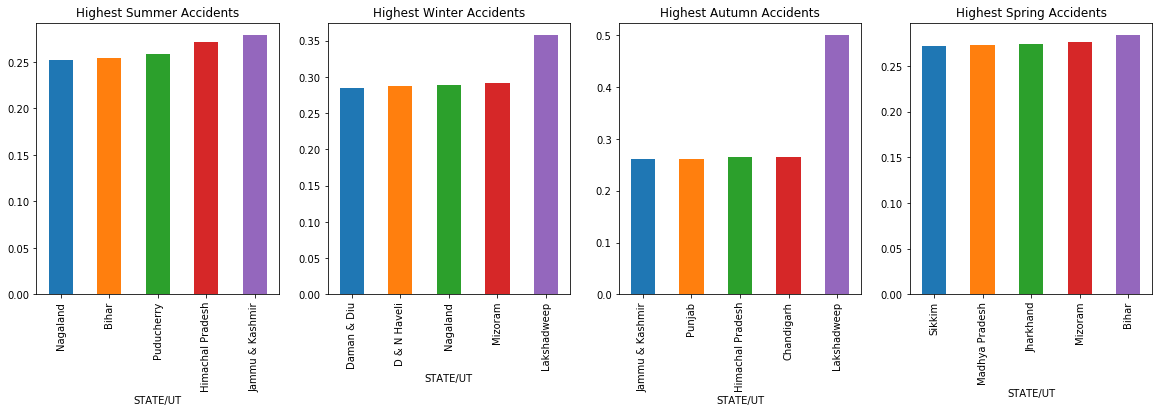

In [6]:
plt.figure(figsize=(20,5))
plt.subplot(141)
summer_sorted=state_grouped.sort_values('%_SUMMER')
summer_sorted['%_SUMMER'].tail(5).plot.bar(title='Highest Summer Accidents')
plt.subplot(142)
winter_sorted=state_grouped.sort_values('%_WINTER')
winter_sorted['%_WINTER'].tail(5).plot.bar(title='Highest Winter Accidents')
plt.subplot(143)
autumn_sorted=state_grouped.sort_values('%_AUTUMN')
autumn_sorted['%_AUTUMN'].tail(5).plot.bar(title='Highest Autumn Accidents')
plt.subplot(144)
spring_sorted=state_grouped.sort_values('%_SPRING')
spring_sorted['%_SPRING'].tail(5).plot.bar(title='Highest Spring Accidents')


What we can interpret:
      For summer, the smaller states occupy the major positions. Same is for winter and autumn. For winter and autumn, Lakshadweep has high % of accidents. But , we can not make any interpretation as the overall number of accidents in Lakshwadeep is low. Some anomaly may be there. States with highesst spring time accidents share are at par.
     
    

## Yearly progress of states with highest accidents

In [7]:
highest_accident_states=state_grouped.sort_values('TOTAL', ascending=False)

high_states=list(highest_accident_states.head().index)
df4=state_year_month_df.loc[state_year_month_df['STATE/UT'].isin(high_states),['STATE/UT','YEAR','TOTAL']]

for key, grp in df4.groupby(['STATE/UT']):
    ax = grp.plot(ax=ax, kind='line', x='YEAR', y='TOTAL', label=key)

plt.show()

we can see something unusual for Tamilnadu in year 2005. Lets not dig deeper, but applaud other states, which have improved over years.

## Working on over the day accident data..

### Over the day accident distribution for the top states

['Tamil Nadu', 'Maharashtra', 'Karnataka', 'Andhra Pradesh', 'Kerala']
STATE/UT     Andhra Pradesh  Karnataka    Kerala  Maharashtra  Tamil Nadu
%_MORNING          0.243550   0.262034  0.305824     0.251308    0.262432
%_AFTERNOON        0.266599   0.309697  0.377321     0.288688    0.309382
%_EVENING          0.281997   0.271413  0.251532     0.278231    0.277180
%_NIGHT            0.207854   0.156856  0.065323     0.181773    0.151006


array([<matplotlib.axes._subplots.AxesSubplot object at 0x000000DAE502DE48>,
      dtype=object)

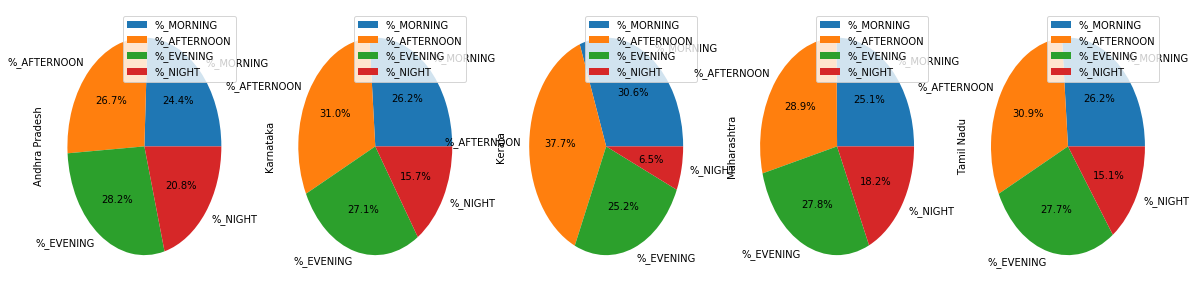

In [8]:
highest_accident_states=state_grouped.sort_values('TOTAL', ascending=False)
state_list=list(highest_accident_states.head().index)

print(state_list)
df=state_time_grouped.loc[state_time_grouped.index.isin(state_list)]
#print(df.drop(['TOTAL','YEAR'], axis=1).T)
df_T=df.groupby('STATE/UT').sum().drop(['Total'], axis=1).T
print(df_T)
df_T.plot.pie(subplots=True, figsize=(20, 5),autopct='%1.1f%%')

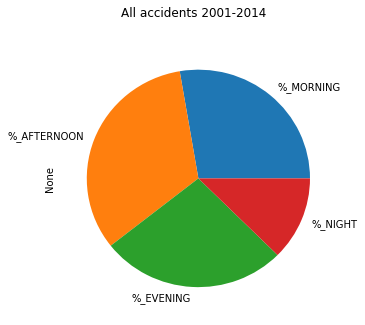

In [9]:
## Break up accidents for all states over the time blocks:
#state_time_grouped.info()
df2=state_time_grouped.sum(axis=0)
#print(df2)
df2.drop(['Total']).T.plot.pie(title='All accidents 2001-2014',subplots=True, figsize=(5,5))

df2=state_time_grouped.sum(axis=0)

#print(df3)

YEAR     2001    2002    2003    2004    2005    2006    2007    2008    2009  \
0-3     23869   24395   24509   25366   28387   30236   32442   31092   28984   
3-6     30949   29140   30814   31700   34642   35344   35827   34726   34799   
6-9     41612   42070   41776   44206   47728   46807   48604   49001   48671   
9-12    50293   52820   52575   57848   62915   59135   62878   61367   64191   
12-15   47291   49576   48396   52017   56814   56823   61361   61767   61639   
15-18   49925   52928   52930   57284   63565   62023   65815   66811   68835   
18-21   46663   49173   49833   54450   57039   60584   64203   64365   63973   
21-24   33118   35605   35635   38472   39288   43480   47527   46726   50536   
Total  323720  335707  336468  361343  390378  394432  418657  415855  421628   

YEAR     2010    2011    2012    2013    2014  
0-3     29129   29483   27905   28332   26068  
3-6     37693   37219   34134   35385   32554  
6-9     52199   52139   52001   52771   52279

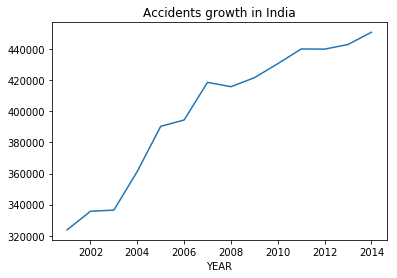

In [10]:
df3=state_year_time_df.groupby(['YEAR']).sum()
df3.loc[:,'Total'].plot(title='Accidents growth in India')
print(df3.T)


#How to merge columns to create new column?

Index(['Tamil Nadu', 'Maharashtra', 'Karnataka', 'Andhra Pradesh', 'Kerala'], dtype='object', name='STATE/UT')

,STATE/UT,YEAR,0-3,3-6,6-9,9-12,12-15,15-18,18-21,21-24,Total


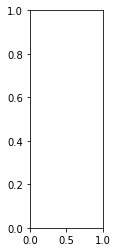

In [11]:
#See the states with highest % accident in the every timeblock..
state_time_grouped.sort_values('%_MORNING',ascending=False).head()
state_time_grouped.sort_values('%_AFTERNOON',ascending=False).head()
state_time_grouped.sort_values('%_EVENING',ascending=False).head()
state_time_grouped.sort_values('%_NIGHT',ascending=False).head()

type(state_time_grouped.values)
#display(highest_accident_states['STATE/UT'].head())
display(highest_accident_states.head().index)


#display(type(highest_accident_states['STATE/UT']))
top=state_year_time_df.loc[state_year_time_df.index.isin(highest_accident_states.head(5).index)].sort_values('Total', ascending=False)
display(top)


#Creating pie char, stacked bar charts for each state
plt.subplot(141)
#plt.pie(state_year_time_df[0,1:4].values)
plt.show()

## Checking performance of states from 2001 to 2014

In [12]:

#Create a new dataframe - period_performance.
period_performance=pd.DataFrame(columns=['STATE/UT','%_CHANGE_2001_TO_2014'])


#Take one state name at a time,
for state in state_names:
    #print(state)
    total_2001=state_year_month_df.loc[(state_year_month_df['STATE/UT']==state) & (state_year_month_df['YEAR']==2001), 'TOTAL']
    total_2014=state_year_month_df.loc[(state_year_month_df['STATE/UT']==state) & (state_year_month_df['YEAR']==2014), 'TOTAL']
    value_2001=total_2001.iloc[0]
    value_2014=total_2014.iloc[0]
    change_in_percent= (value_2014-value_2001)*100/value_2001
   
    new_data=pd.Series({'STATE/UT':state, '%_CHANGE_2001_TO_2014':change_in_percent})
    period_performance=period_performance.append(new_data, ignore_index=True)
    




[Text(0,0,'Lakshadweep'),
 Text(0,0,'Nagaland'),
 Text(0,0,'Puducherry'),
 Text(0,0,'Chandigarh'),
 Text(0,0,'Arunachal Pradesh'),
 Text(0,0,'Uttarakhand'),
 Text(0,0,'Delhi (Ut)'),
 Text(0,0,'Kerala'),
 Text(0,0,'D & N Haveli'),
 Text(0,0,'Daman & Diu'),
 Text(0,0,'Gujarat'),
 Text(0,0,'Jammu & Kashmir'),
 Text(0,0,'Maharashtra'),
 Text(0,0,'A & N Islands'),
 Text(0,0,'Rajasthan'),
 Text(0,0,'Tamil Nadu'),
 Text(0,0,'Tripura'),
 Text(0,0,'Mizoram'),
 Text(0,0,'Karnataka'),
 Text(0,0,'Uttar Pradesh'),
 Text(0,0,'West Bengal'),
 Text(0,0,'Odisha'),
 Text(0,0,'Himachal Pradesh'),
 Text(0,0,'Andhra Pradesh'),
 Text(0,0,'Haryana'),
 Text(0,0,'Manipur'),
 Text(0,0,'Meghalaya'),
 Text(0,0,'Madhya Pradesh'),
 Text(0,0,'Bihar'),
 Text(0,0,'Sikkim'),
 Text(0,0,'Chhattisgarh'),
 Text(0,0,'Goa'),
 Text(0,0,'Punjab'),
 Text(0,0,'Assam'),
 Text(0,0,'Jharkhand')]

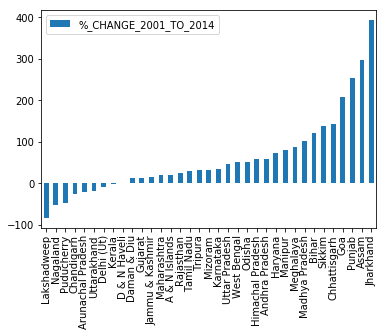

In [13]:
best_performing=period_performance.sort_values('%_CHANGE_2001_TO_2014')
#print(best_performing.head())
ax=best_performing.plot(kind='bar')
ax.set_xticklabels(best_performing['STATE/UT'])
